# Week 9 IT Class Ordinary Differential Equations

## Question 1

We have the ODE:

$$\frac{dy}{dt}=y$$

subject to the initial condition $y(0)=1$.

(a)	Use the RK4 method and Python to calculate $y(1)$, with different time steps $h = 0.2, 0.1, 0.04, 0.01,$

(b)	plot the difference between the exact value of $y(1)$ and the numerical approximation as a function $h$, what is the order of accuracy of the RK4?


## Answer

<b>(a) </b> Recall the analytical solution of thie ODE is:
$$y=e^{t}.$$
The Python code to solve the ODE using RK4 method is shown below:

In [1]:
import numpy as np
import math

The iteration formula for the RK4 method can be devided into the following steps:

Step 1: calculate 
$$K_1 = f(t_n,y_n)$$

Step 2: calculate 
$$K_2 = f(t_{n+1/2},y_n+\frac{1}{2}hK_1)$$

Step 3: calculate
$$K_3 = f(t_{n+1/2},y_n+\frac{1}{2}hK_2)$$

Step 4: calculate
$$K_4 = f(t_{n+1},y_n+hK_3)$$

Step 5: calculate
$$y_{n+1} = y_{n} + h\frac{K_1+2K_2+2K_3+K_4}{6}$$

Here, $f(t_n,y_n)=y_n$.


In [2]:
h = 0.2                   # You can change h here, h=0.2,0.1,0.04,0.01
nsteps = math.floor(1/h)  # Number of iterations for t=1 with the time step h
f = lambda t,y : y         # Defination of the function f(t,y)=y
y = 1                     # Initial value. y(t=0)=1.
t = 0                     # start from t=0
for i in range(nsteps): # RK4 iteration loop
    k1 = f(t,y)                        # K1 = f(tn , yn)
    k2 = f(t + 0.5 * h,y + 0.5 * h * k1)   # K2 = f(tn+1/2 , yn + h / 2 * K1)
    k3 = f(t + 0.5 * h,y + 0.5 * h * k2)   # K3 = f(tn+1/2 , yn + h / 2 * K2)
    k4 = f(t + h,y + h * k3)               # K4 = f(tn+1 , yn + h * K3)
    # yn+1 = yn + h * (K1 + 2K2 +2K3 + K4) / 6
    y = y + h * (k1 + 2 * k2 + 2 * k3 + k4)/ 6 
    t = t + h

print(f'Using the midpoint method with h =', h, 'y(1) =', y)

diff = abs(y - math.exp(1))            # Error of the numerical solution.
print(f'The difference between the numerical and analytical solutions is', diff)

Using the midpoint method with h = 0.2 y(1) = 2.7182511366059354
The difference between the numerical and analytical solutions is 3.06918531096656e-05


 <b> (b) </b> Now we calculate y(1) at different step size and plot the results. Please use the code above and fill your results in the two arrays <b>hs</b> and <b>diffs</b> in the code below.

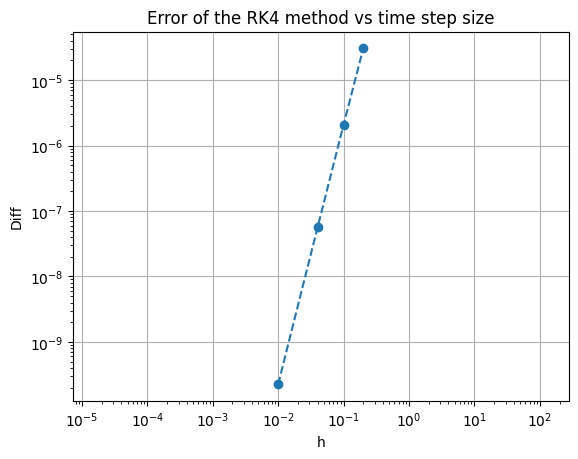

In [3]:
import matplotlib.pyplot as plt

# Please calculate difference between analytical solution and nuemrical solution using previous code section.
hs=[0.01,0.04,0.1,0.2]      #h values
diff=[2.246416386e-10,5.6089764833e-08,2.0843238793e-06,3.069185311e-05]      #Difference between numerical and analytical solution

# Plot time step vs error in dual log scale.
plt.plot(hs,diff,'--o')
plt.title('Error of the RK4 method vs time step size')
plt.xlabel('h')
plt.ylabel('Diff')
plt.yscale('log')
plt.xscale('log')
plt.axis('equal')
plt.grid()
plt.show()

It's in the order of $O(h^4)$

## Question 2

Temperature of an object follows the Newton’s cooling law:

$$\frac{dT}{dt} = -k(T-T_{s}).$$

Assume the initial temperature of the object is $100^{\circ}C$ at $t = 0$, and the environment temperature $T_{s} = 20^{\circ}C$. The constant $k = 1  (1/s)$. 

(a)use the RK4 method with $h = 0.2$ to calculate the time evolution of $T$ till $t = 2$ s, plot the result

(b)repeat (a) with the midpoint method

(c)repeat (a) with the Euler’s method

(d)Compare of the results of (a-c) and the exact solution

### Answer

<b>(a) </b> Using RK4 method, we need to iterate using Python

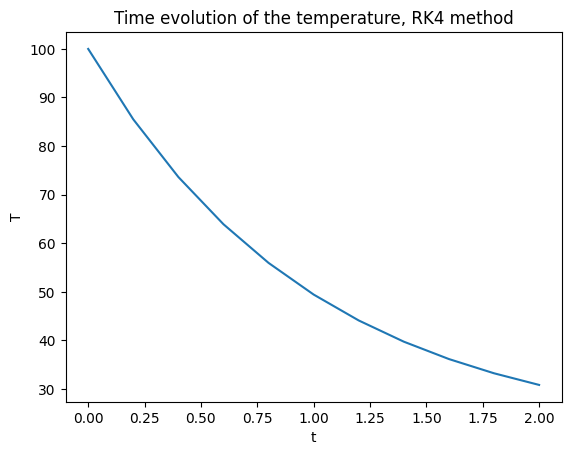

In [4]:
h = 0.2
nsteps = math.floor(2/h)      # Number of iterations, 2s
f = lambda t,T : -(T - 20)    # Function defination. f(t,T)=-(T-20).
t_r = np.zeros(nsteps+1)      # Initialize zero array for RK4 method.
T_r = np.zeros(nsteps+1)
t_r[0] = 0
T_r[0] = 100
for i in range(nsteps):       # RK4 iteration loop
    k1 = f(t_r[i],T_r[i])
    k2 = f(t_r[i] + 0.5 * h , T_r[i] + 0.5 * h * k1)
    k3 = f(t_r[i] + 0.5 * h , T_r[i] + 0.5 * h * k2)
    k4 = f(t_r[i] + h , T_r[i] + h * k3)
    T_r[i+1] = T_r[i] + h * (k1 + 2 * k2 + 2 * k3 + k4) / 6
    t_r[i+1] = t_r[i] + h

plt.plot(t_r,T_r)
plt.xlabel('t')
plt.ylabel('T')
plt.title('Time evolution of the temperature, RK4 method')
plt.show()

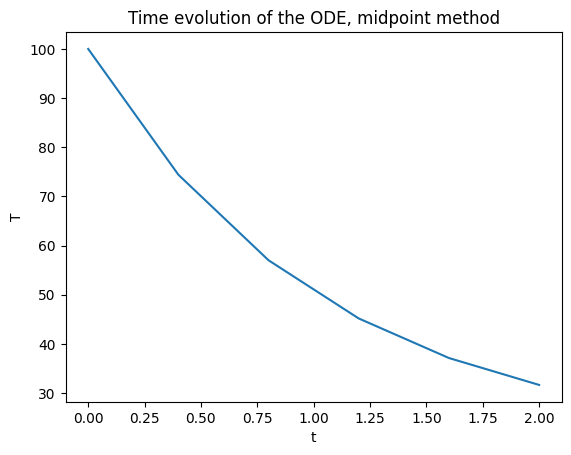

In [5]:
#midpoint method
h = 0.4
nsteps = math.floor(2/h)      # Number of iterations, 2s
f = lambda t,T : -(T - 20)    # Function defination. f(t,T)=-(T-20).
t_m = np.zeros(nsteps + 1)    # Initialize zero array for the results of midpoint method
T_m = np.zeros(nsteps + 1)
t_m[0] = 0
T_m[0] = 100
for i in range(nsteps):
    t_mid = t_m[i] + h / 2
    y_mid = T_m[i] + h / 2 * f(t_m[i], T_m[i])
    T_m[i+1] = T_m[i] + h * f(t_mid, y_mid)
    t_m[i+1] = t_m[i] + h

plt.plot(t_m,T_m)
plt.xlabel('t')
plt.ylabel('T')
plt.title('Time evolution of the ODE, midpoint method')
plt.show()

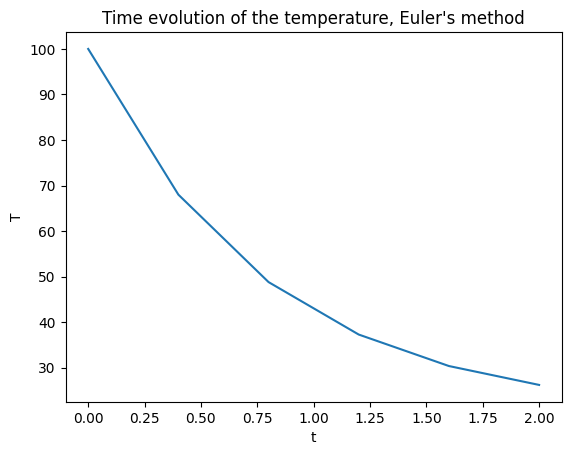

In [6]:
#Euler's method
h = 0.4
nsteps = math.floor(2/h)         # Number of iterations, 2s.
t_e = np.zeros(nsteps+1)         # Initialize zero array for the results of Euler's method
T_e = np.zeros(nsteps+1)
t_e[0] = 0
T_e[0] = 100
for i in range(nsteps):
    T_e[i+1] = T_e[i] + h * f(t_e[i],T_e[i])
    t_e[i+1] = t_e[i] + h

plt.plot(t_e,T_e)
plt.xlabel('t')
plt.ylabel('T')
plt.title('Time evolution of the temperature, Euler\'s method')
plt.show()

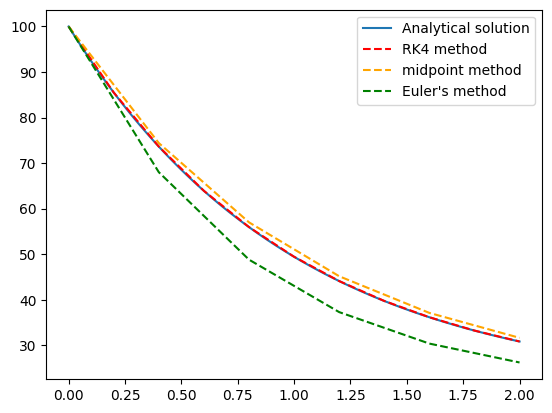

In [7]:
#analytical solution
h = 0.02
nsteps = math.floor(2/h)          # Number of iterations, 2s.
t_a = np.zeros(nsteps+1)          # Initialize zero array for analytical solution.
T_a = np.zeros(nsteps+1)
t_a[0] = 0
T_a[0] = 100
for i in range(nsteps):
    t_a[i+1] = t_a[i] + h
    T_a[i+1] = 80 * math.exp(-t_a[i+1]) + 20

plt.plot(t_a,T_a,label='Analytical solution')
plt.plot(t_r,T_r,'--',color='r',label='RK4 method')
plt.plot(t_m,T_m,'--',color='orange',label='midpoint method')
plt.plot(t_e,T_e,'--',color='green',label='Euler\'s method')
plt.legend(loc='upper right')
plt.show()